[start of section 5.1](#tables)

[5.2](#5.2)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/ds-modules/course-assets/gh-pages/materials/su20/Spotify/spotify.csv'
spotify = pd.read_csv(url)

# Dropping unnecessary columns
spotify = spotify.drop(['Unnamed: 0', 'track_album_id', 'playlist_id'], axis=1)

# Converting date to datetime to visualize datetime
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date']) 

# Creating columns 
spotify['duration_sec'] = spotify['duration_ms']/1000

In [3]:
spotify.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity  \
0        Ed Sheeran                66   
1          Maroon 5                67   
2      Zara Larsson                70   
3  The Chainsmokers                60   
4     Lewis Capaldi                69   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name playlist_genre playlist_subgenre  danceability  ...  loudness  \
0     Pop Remix            pop         dance pop         0.748  ...    -2.634   
1     Pop Remix            pop         dance pop         0.726  ...    -4.969   
2     Pop Remix            pop         dance pop         0.675  ...    -3.432   
3     Pop Remix            pop         dance pop         0.718  ...    -3.778   
4     Pop Remix            pop         dance pop         0.650  ...    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  duration_sec  
0  122.036     194754.0       194.754  
1   99.972     162600.0       162.600  
2  124.008     176616.0       176.616  
3  121.956     169093.0       169.093  
4  123.976     189052.0       189.052  

[5 rows x 22 columns]

In [4]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'duration_sec'],
      dtype='object')

In [5]:
spotify['loudness'].describe()

count    32833.000000
mean        -6.719499
std          2.988436
min        -46.448000
25%         -8.171000
50%         -6.166000
75%         -4.645000
max          1.275000
Name: loudness, dtype: float64

In [6]:
spotify['track_artist'].unique()

array(['Ed Sheeran', 'Maroon 5', 'Zara Larsson', ...,
       'Ferry Corsten feat. Jenny Wahlstrom', 'Tegan and Sara', 'Mat Zo'],
      dtype=object)

## Functions and Visualization

In [7]:
def distplots(column, artist1, artist2):

    '''
    Display overlapping histograms of some attribute of music of two different artists.
    
    Parameters:
    column - the attribute to be compared.
    artist1, artist2 - two artists from the spotify table.
    '''
    
    if artist1 not in spotify['track_artist'].unique() or artist2 not in spotify['track_artist'].unique():
        return ("Unable to plot graphs: artist(s) not found.")
    
    plt.figure(figsize=(10, 5))
    
    artist1_df = spotify[spotify['track_artist'] == artist1]
    artist2_df = spotify[spotify['track_artist'] == artist2]
   
    sns.distplot(artist1_df[column], label = artist1)
    sns.distplot(artist2_df[column], label = artist2)
    
    plt.legend()

In [8]:
# distplots('loudness', 'Katy')

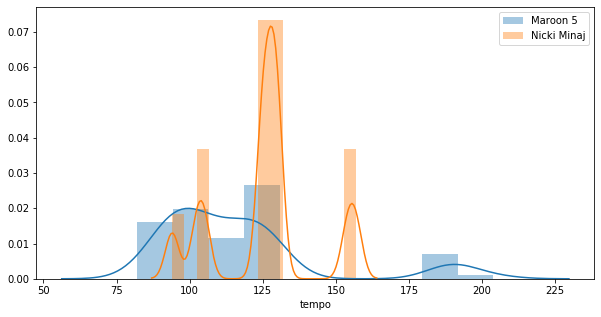

In [9]:
distplots('tempo', 'Maroon 5', 'Nicki Minaj')

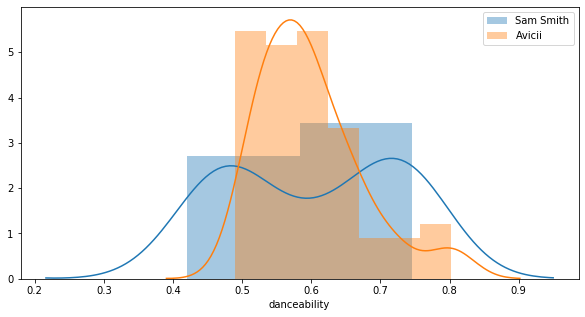

In [10]:
distplots('danceability', 'Sam Smith', 'Avicii')

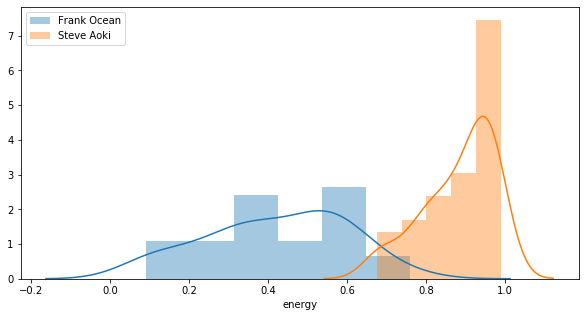

In [11]:
distplots('energy', 'Frank Ocean', 'Steve Aoki')

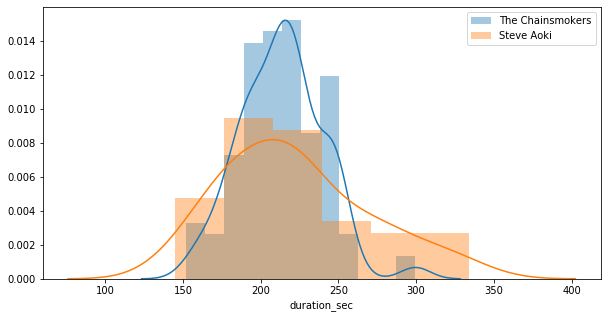

In [12]:
distplots('duration_sec', 'The Chainsmokers', 'Steve Aoki')

# Analyzing Playlist Popularity by Track

In [13]:
names = spotify['playlist_name'].unique()
popularities = []
count = []

for playlist in names:
    subset = spotify[spotify['playlist_name'] == playlist]
    popularities.append(subset['track_popularity'].sum())
    count.append(len(subset))
    

In [14]:
playlist_pop = pd.DataFrame({'Playlist Name': names, 
              'Aggregate Popularity': popularities,
              'Number of Tracks': count})
playlist_pop.head()

Playlist Name  Aggregate Popularity  Number of Tracks
0       Pop Remix                  4174                70
1       Dance Pop                  8380               138
2      Dance Room                  3355                56
3          Cardio                  2641                49
4  Dance Pop Hits                  4051                63

In [15]:
playlist_pop.sort_values(by='Aggregate Popularity', ascending=False).head()

Playlist Name  Aggregate Popularity  \
253     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                 20547   
193                                     Permanent Wave                 13261   
63                                     Indie Poptimism                 13107   
321  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...                 12670   
15   Ultimate Indie Presents... Best Indie Tracks o...                 11840   

     Number of Tracks  
253               247  
193               244  
63                308  
321               189  
15                198

In [16]:
playlist_pop.sort_values(by='Number of Tracks', ascending=False).head()

Playlist Name  Aggregate Popularity  \
63                                     Indie Poptimism                 13107   
253     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                 20547   
193                                     Permanent Wave                 13261   
208                                  Hard Rock Workout                  8713   
15   Ultimate Indie Presents... Best Indie Tracks o...                 11840   

     Number of Tracks  
63                308  
253               247  
193               244  
208               219  
15                198

In [17]:
playlist_pop['Proportion'] = playlist_pop['Aggregate Popularity']/playlist_pop['Number of Tracks']

In [18]:
playlist_pop.sort_values(by='Proportion', ascending=False).head()
# Can do this with groupby

Playlist Name  Aggregate Popularity  \
253   2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                 20547   
73                                         RapCaviar                  3985   
302                         Most Popular 2020 TOP 50                  3808   
19   Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop                  7913   
261                                  Baila Reggaeton                  3885   

     Number of Tracks  Proportion  
253               247   83.186235  
73                 50   79.700000  
302                48   79.333333  
19                100   79.130000  
261                50   77.700000

In [19]:
# Further visualization

artists = spotify['track_artist'].unique()
popular_artists = []
count_artists = []

for artist in artists:
    subset = spotify[spotify['track_artist'] == artist]
    count_artists.append(len(subset))
    
    
popular_artists = pd.DataFrame({'Artist': artists, 
              'Number of Tracks': count_artists})

popular_artists

Artist  Number of Tracks
0                               Ed Sheeran                69
1                                 Maroon 5                71
2                             Zara Larsson                28
3                         The Chainsmokers               123
4                            Lewis Capaldi                21
...                                    ...               ...
10688                         The Cataracs                 1
10689                              Qubicon                 1
10690  Ferry Corsten feat. Jenny Wahlstrom                 1
10691                       Tegan and Sara                 1
10692                               Mat Zo                 1

[10693 rows x 2 columns]

In [20]:
# top 10 artists
popular_artists.sort_values('Number of Tracks', ascending=False).head(10)

Artist  Number of Tracks
11                Martin Garrix               161
1053                      Queen               136
3              The Chainsmokers               123
13                 David Guetta               110
1215                   Don Omar               102
1161                      Drake               100
93    Dimitri Vegas & Like Mike                93
36                Calvin Harris                91
132                    Hardwell                84
27                         Kygo                83

## Converting to `datascience` style

In [21]:
from datascience import *

# Ch. 5.1 Interlude: Tables <a id='tables'></a>

Before we journey deeper into distributions, we will need a new data type. Visualizations often show several pieces of information about the individuals in a data set. For example:

- We made a *scatter plot* of the fuel efficiency (miles per gallon) and price of car models. For each car model, we needed to somehow link its fuel efficiency and its price.
- We made a *line plot* of the proportion of new comic book characters who were female versus time (in years). We needed to link years to proportions of female characters.

Visualizing distributions often has similar requirements.

It is possible to maintain a separate array for each kind of data and link individuals by their position in these arrays. For example, we could have an array of fuel efficiencies and an array of prices, where the first fuel efficiency number and the first price refer to the same car. However, there are many advantages to organizing them in a single data set.

### Tables
Tables are a fundamental object type for representing data sets that include multiple pieces of information about individuals. A table can be viewed in two ways:

- a sequence of named *columns* that each describe a single aspect of all entries in a data set, or
- a sequence of rows that each contain all information about a single entry in a data set.

**Terminology:** A *variable* is a formal name for an 'aspect' or 'piece of information' or 'column' in a dataset. Variables are also called *features*. The term *variable* emphasizes that the piece of data can have different values for different individuals - each car model has (potentially) a different fuel efficiency.

Variables that have numerical values, such as 'fuel efficiency' or 'price,' are called *quantitative* or *numerical* variables. Variables that have non-numerical values, such as 'model name' or 'gender,' are called *qualitative* or *categorical* variables.

### Creating an empty table
In order to use tables, import the module called `datascience`, a module created for this text. You can simple write `import datascience`, but the alternate import statement below allows us to refer to things in the datascience module without writing "datascience." everywhere in our code.

In [ ]:
from datascience import *

Empty tables can be created by calling the `Table` function with no arguments. An empty table is useful because it can be extended to contain new rows and columns.

In [55]:
Table()

### Adding columns
Recall that the `replace` method of a string constructs a new string based on the existing string. Thus, the value of `"foo".replace("o", "e")` is the string `"fee"`, but this call to replace doesn't modify `"foo"`.

Analogously, the `with_columns` method on a table constructs and returns a new table with additional labeled columns. Each column of a table is an array. To add one new column to a table, call `with_columns` with a label and an array. (The `with_column` method can be used with the same effect.)

Below, we begin each example with an empty table that has no columns.

In [56]:
Table().with_columns('Number of petals', make_array(8, 34, 5))

Number of petals
8
34
5

To add two (or more) new columns, provide the label and array for each column. All columns must have the same length, or an error will occur.

In [57]:
# It's nice, but optional, to line up the arguments to with_columns
# using extra spaces.  This makes it easy to see what's in the
# columns when we read the code. 
Table().with_columns(
    'Number of petals', make_array(8,       34,          5),
    'Name',             make_array('lotus', 'sunflower', 'rose')
)

Number of petals | Name
8                | lotus
34               | sunflower
5                | rose

We can give this table a name, and then extend the table with another column.

In [58]:
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)

flowers.with_columns(
    'Color', make_array('pink', 'yellow', 'red')
)

Number of petals | Name      | Color
8                | lotus     | pink
34               | sunflower | yellow
5                | rose      | red

The `with_columns` method creates a new table each time it is called, so the original table is not affected. For example, the table `flowers` still has only the two columns that it had when it was created.

In [59]:
flowers

Number of petals | Name
8                | lotus
34               | sunflower
5                | rose

### Loading datasets
Tables are often created from files that contain comma separated values, called CSV files. Sometimes these files are stored locally on our computers, and sometimes they are stored remotely, such as on Github. Below, we use the method `Table.read_table` to read the CSV file from the given url, and we store the resulting table with the name `spotify`.

In [22]:
url = 'https://raw.githubusercontent.com/ds-modules/course-assets/gh-pages/materials/su20/Spotify/spotify.csv'
spotify = Table.read_table(url)
spotify

Unnamed: 0 | track_id               | track_name                                            | track_artist     | track_popularity | track_album_id         | track_album_name                                      | track_album_release_date | playlist_name | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms
1          | 6f807x0ima9a1j3VPbc7VN | I Don't Care (with Justin Bieber) - Loud Luxury Remix | Ed Sheeran       | 66               | 2oCs0DGTsRO98Gh5ZSl2Cx | I Don't Care (with Justin Bieber) [Loud Luxury Remix] | 2019-06-14               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.748        | 0.916  | 6    | -2.634   | 1    | 0.0583      | 0.102        | 0                | 0.0653   | 0.518   | 122.036 | 194754
2          | 0r7CVbZTWZgbTCYdfa2P31 | Memories - Dillon Francis Remix                       | Maroon 5         | 67               | 63rPSO264uRjW1X5E6cWv6 | Memories (Dillon Francis Remix)                       | 2019-12-13               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.726        | 0.815  | 11   | -4.969   | 1    | 0.0373      | 0.0724       | 0.00421          | 0.357    | 0.693   | 99.972  | 162600
3          | 1z1Hg7Vb0AhHDiEmnDE79l | All the Time - Don Diablo Remix                       | Zara Larsson     | 70               | 1HoSmj2eLcsrR0vE9gThr4 | All the Time (Don Diablo Remix)                       | 2019-07-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.931  | 1    | -3.432   | 0    | 0.0742      | 0.0794       | 2.33e-05         | 0.11     | 0.613   | 124.008 | 176616
4          | 75FpbthrwQmzHlBJLuGdC7 | Call You Mine - Keanu Silva Remix                     | The Chainsmokers | 60               | 1nqYsOef1yKKuGOVchbsk6 | Call You Mine - The Remixes                           | 2019-07-19               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.718        | 0.93   | 7    | -3.778   | 1    | 0.102       | 0.0287       | 9.43e-06         | 0.204    | 0.277   | 121.956 | 169093
5          | 1e8PAfcKUYoKkxPhrHqw4x | Someone You Loved - Future Humans Remix               | Lewis Capaldi    | 69               | 7m7vv9wlQ4i0LFuJiE2zsQ | Someone You Loved (Future Humans Remix)               | 2019-03-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.65         | 0.833  | 1    | -4.672   | 1    | 0.0359      | 0.0803       | 0                | 0.0833   | 0.725   | 123.976 | 189052
6          | 7fvUMiyapMsRRxr07cU8Ef | Beautiful People (feat. Khalid) - Jack Wins Remix     | Ed Sheeran       | 67               | 2yiy9cd2QktrNvWC2EUi0k | Beautiful People (feat. Khalid) [Jack Wins Remix]     | 2019-07-11               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.919  | 8    | -5.385   | 1    | 0.127       | 0.0799       | 0                | 0.143    | 0.585   | 124.982 | 163049
7          | 2OAylPUDDfwRGfe0lYqlCQ | Never Really Over - R3HAB Remix                       | Katy Perry       | 62               | 7INHYSeusaFlyrHSNxm8qH | Never Really Over (R3HAB Remix)                       | 2019-07-26               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.449        | 0.856  | 5    | -4.788   | 0    | 0.0623      | 0.187        | 0                | 0.176    | 0.152   | 112.648 | 187675
8          | 6b1RNvAcJjQH73eZO4BLAB | Post Malone (feat. RANI) - GATTÜSO Remix              | Sam Feldt        | 69               | 6703SRPsLkS4bPtMFFJes1 | Post Malone (feat. RANI) [GATTÜSO Remix]              | 2019-08-29               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.542        | 0.903  | 4    | -2.419   | 0    | 0.04

### Accessing columns
The simplest way to access data in a table is the `column` method, which takes in the name of the column as its only argument. It returns the contents of the column as an array. Imagine that we want to know the duration of all the songs in our dataset. We can access the `duration_ms` column using the column method.

In [23]:
spotify.column("duration_ms")

array([194754., 162600., 176616., ..., 210112., 367432., 337500.])

We can give this array a name in order to more easily work with the values in it. The name can be whatever we want, but for clarity we'll simply name it `duration`.

In [24]:
duration = spotify.column("duration_ms")
duration

array([194754., 162600., 176616., ..., 210112., 367432., 337500.])

Since `duration` is just an array, we can perform array operations on it.

### Functions Applied to Track Durations
Right now, the `duration` array contains the length of each song in milliseconds. However, that's not a common measurement when describing the length of a song - often, we use minutes and seconds. Using array arithmetic, we can find the length of each song in seconds and in minutes. There are 1000 milliseconds in a second, and 60 seconds in a minute. First, we will convert milliseconds to seconds.

In [25]:
duration_seconds = duration / 1000
duration_seconds

array([194.754, 162.6  , 176.616, ..., 210.112, 367.432, 337.5  ])

Now that we have a new array of the duration of songs in seconds, we can use that to convert to duration in minutes using similar array math.

In [26]:
duration_minutes = duration_seconds / 60
duration_minutes 

array([3.2459    , 2.71      , 2.9436    , ..., 3.50186667, 6.12386667,
       5.625     ])

If you are interested in the average length of a song, you can find the mean of the array with built in methods.

In [27]:
duration_minutes.mean()

3.7633301937075503

We can use the table `with_columns` method to create a copy of the `spotify` table with the duration in minutes as a new column.

In [54]:
spotify.with_columns('duration_min', duration_minutes)

Unnamed: 0 | track_id               | track_name                                            | track_artist     | track_popularity | track_album_id         | track_album_name                                      | track_album_release_date | playlist_name | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | creation_year | duration_min
1          | 6f807x0ima9a1j3VPbc7VN | I Don't Care (with Justin Bieber) - Loud Luxury Remix | Ed Sheeran       | 66               | 2oCs0DGTsRO98Gh5ZSl2Cx | I Don't Care (with Justin Bieber) [Loud Luxury Remix] | 2019-06-14               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.748        | 0.916  | 6    | -2.634   | 1    | 0.0583      | 0.102        | 0                | 0.0653   | 0.518   | 122.036 | 194754      | 2019          | 3.2459
2          | 0r7CVbZTWZgbTCYdfa2P31 | Memories - Dillon Francis Remix                       | Maroon 5         | 67               | 63rPSO264uRjW1X5E6cWv6 | Memories (Dillon Francis Remix)                       | 2019-12-13               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.726        | 0.815  | 11   | -4.969   | 1    | 0.0373      | 0.0724       | 0.00421          | 0.357    | 0.693   | 99.972  | 162600      | 2019          | 2.71
3          | 1z1Hg7Vb0AhHDiEmnDE79l | All the Time - Don Diablo Remix                       | Zara Larsson     | 70               | 1HoSmj2eLcsrR0vE9gThr4 | All the Time (Don Diablo Remix)                       | 2019-07-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.931  | 1    | -3.432   | 0    | 0.0742      | 0.0794       | 2.33e-05         | 0.11     | 0.613   | 124.008 | 176616      | 2019          | 2.9436
4          | 75FpbthrwQmzHlBJLuGdC7 | Call You Mine - Keanu Silva Remix                     | The Chainsmokers | 60               | 1nqYsOef1yKKuGOVchbsk6 | Call You Mine - The Remixes                           | 2019-07-19               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.718        | 0.93   | 7    | -3.778   | 1    | 0.102       | 0.0287       | 9.43e-06         | 0.204    | 0.277   | 121.956 | 169093      | 2019          | 2.81822
5          | 1e8PAfcKUYoKkxPhrHqw4x | Someone You Loved - Future Humans Remix               | Lewis Capaldi    | 69               | 7m7vv9wlQ4i0LFuJiE2zsQ | Someone You Loved (Future Humans Remix)               | 2019-03-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.65         | 0.833  | 1    | -4.672   | 1    | 0.0359      | 0.0803       | 0                | 0.0833   | 0.725   | 123.976 | 189052      | 2019          | 3.15087
6          | 7fvUMiyapMsRRxr07cU8Ef | Beautiful People (feat. Khalid) - Jack Wins Remix     | Ed Sheeran       | 67               | 2yiy9cd2QktrNvWC2EUi0k | Beautiful People (feat. Khalid) [Jack Wins Remix]     | 2019-07-11               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.919  | 8    | -5.385   | 1    | 0.127       | 0.0799       | 0                | 0.143    | 0.585   | 124.982 | 163049      | 2019          | 2.71748
7          | 2OAylPUDDfwRGfe0lYqlCQ | Never Really Over - R3HAB Remix                       | Katy Perry       | 62               | 7INHYSeusaFlyrHSNxm8qH | Never Really Over (R3HAB Remix)                       | 2019-07-26               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.449        | 0.856  | 5    | -4.788   | 0    | 0.0623      | 0.187        | 0                | 0.176    | 0.152   | 112.648 | 187675      | 2019          | 3.12792
8          | 6b1RNvAcJjQH73eZO4BLAB | Post Malone (feat. RANI) - GATTÜSO Remix              | Sam Feldt        | 69             

In future sections, we will discuss more ways to work with data in tables.

# 5.2 Visualizing Categorical Distributions <a id = '5.2'></a>

Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of *categorical* variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
- The individuals are professional basketball players, and the variable is the player's team.
- The individuals are years, and the variable is the genre of the highest grossing movie of the year.
- The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."
The table `icecream` contains data on 30 cartons of ice-cream.

In [65]:
icecream = Table().with_columns(
    'Flavor',
    make_array(
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Vanilla',
        'Strawberry',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Chocolate',
        'Strawberry',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Strawberry',
        'Strawberry',
        'Vanilla',
        'Chocolate',
        'Chocolate',
        'Strawberry',
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Vanilla',
    ))
icecream

Flavor
Chocolate
Vanilla
Vanilla
Vanilla
Strawberry
Chocolate
Chocolate
Chocolate
Vanilla
Vanilla
... (20 rows omitted)

The *values* of the categorical variable "flavor" are chocolate, strawberry, and vanilla. Each row in the table represents one carton with one of these flavors.

### Bar Chart
The bar chart is a familiar way of visualizing count distributions of categorical variables. It counts the number of copies of each category and displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the count of the corresponding category.

In order to count the copies of each category, Python "groups" the individuals by category. (We will see how to do this ourselves later.) We will draw bar charts with horizontal bars because it's easier to label the bars that way. The Table method to create a bar chart from a table of individuals is therefore called `group_barh`.

`group_barh` takes one argument: the label of the column containing the categories.

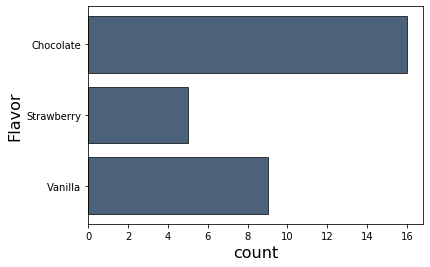

In [66]:
icecream.group_barh('Flavor')

### Features of Categorical Distributions
Apart from purely visual differences, there is an important fundamental distinction between bar charts and the other two graphs that we saw earlier in this textbook. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. In contrast, the bar chart has categories on one axis and numerical counts or frequencies on the other.

This has consequences for the chart.

### The area principle
First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

Why do the widths need to be the same? When humans look at bar charts, we generally interpret larger areas as indicating larger categories. Compare, for example, the following chart with the one above:

![Stretched Bar Chart](bar_chart_stretched.png)

We have made the bar for vanilla artificially wide. You would probably infer from this chart that there are more vanilla cartons than chocolate or strawberry, because the area of that bar is largest.
There is usually no reason to vary widths of bars in a bar chart, so generally we keep all the widths the same and allow the lengths of the bars to determine their areas.

### Ordering the bars
In addition, the bars can be drawn in any order. The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, we will need a few more computational tools. We will review these tools in more detail later, so this is just a preview.

### Sorting the rows of a table
Tables have a method called `sort`. Given the label of a column, `sort` returns a copy of the table where the rows have been sorted in increasing order according to the values in that column.

In [67]:
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)
flowers

Number of petals | Name
8                | lotus
34               | sunflower
5                | rose

In [68]:
flowers.sort("Number of petals")

Number of petals | Name
5                | rose
8                | lotus
34               | sunflower

Notice that `sort` doesn't just sort the given column; it sorts the whole table. Since each row represents one individual (one flower, in this case), it usually wouldn't make sense to sort the elements of a column and leave other columns alone.
We can pass the *named argument* `descending=True` to `sort` to reverse the sort order, which is useful for sorting bars.

In [69]:
flowers.sort("Number of petals", descending=True)

Number of petals | Name
34               | sunflower
8                | lotus
5                | rose

### Counting unique values of a column
Tables have a method called `group` that allows us to count the number of copies of each value in a column. Recall that the `icecream` table has one row for each carton, and the flavors are repeated many times.

In [70]:
icecream.group("Flavor")

Flavor     | count
Chocolate  | 16
Strawberry | 5
Vanilla    | 9

`group` returns a new table with two columns: The given column we are "grouping by," and a column called "count" that tells us the number of copies of each unique value in the given column in the original table.

### Creating a bar chart with customized bar lengths
The method `group_barh` allows us to make a bar chart describing the distribution of elements in one column of a table. In principle, a chart with bars could describe other things. When we need to, we can do a bit of extra work to directly control the lengths of the bars using the table method `barh`.

`barh` takes two arguments. The first argument is the name of a column that contains the category names, and there will be one bar for each element of that column. The second argument is the name of a column that contains numbers, and the length of each bar will be the value in that column.

For example, we could use our `flowers` table to make a bar chart:

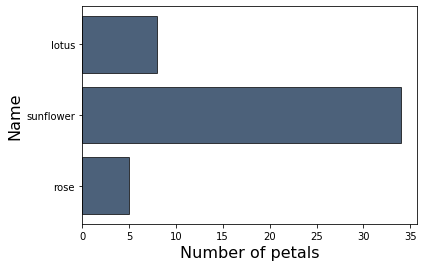

In [71]:
flowers.barh("Name", "Number of petals")

Notice that this is not a bar chart that describes a distribution. There aren't 5 copies of rose anywhere. Rather, the lengths of the bars just tell us how many petals each flower has.

If you look back at the `flowers` table, you might also notice that the bars appear in the same order as the rows in the table. This allows us to control the order of the bars.

### Ordering the bars, continued
Now we are ready to make a bar chart with ordered bars for our ice cream data. When tackling a problem like this, it is useful to work backwards, starting from what we want.

- We want to make a bar chart of the flavors, starting with the most common flavors on top.
- If we have a table telling us the count of each flavor, sorted in decreasing order by count, we can use `barh` to make a bar chart.
- If we have a table telling us the count of each flavor, we can sort it in decreasing order by count with `sort`.
- If we have a table of the individual cartons, we can use `group` to make a table telling us the count of each flavor.
- We have a table of the individual cartons - `icecream`.

Now we can implement this:

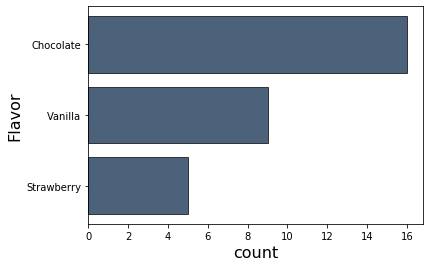

In [72]:
icecream.group('Flavor').sort('count', descending=True).barh('Flavor', 'count')

This bar chart contains exactly the same information as the one we made earlier using `group_barh`, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.

## Example: Spotify
Our Spotify data contains a lot of numerical information about different aspects of the songs, such as danceability, liveliness, tempo, energy, etc. In this section, we are interested in the categorical information in our dataset, such as the playlist each song comes from or the genre. There are almost 33,000 songs in our dataset, so let's do some investigating. What are the most popular genres? We can figure this out by grouping by the playlist genre.

In [29]:
spotify.group('playlist_genre')

playlist_genre | count
edm            | 6043
latin          | 5155
pop            | 5507
r&b            | 5431
rap            | 5746
rock           | 4951

In our dataset, it looks like the most popular genre is EDM. We can create a barchart to show how the other genres compare.

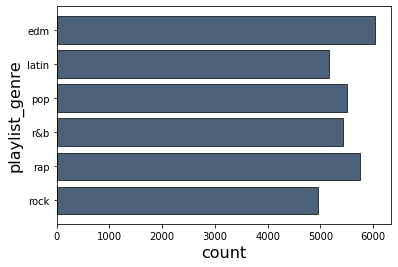

In [30]:
genre_counts = spotify.group('playlist_genre')
genre_counts.barh('playlist_genre', 'count')

The bars aren't ordered by length, so it's a little difficult to compare. We can use a more complicated method of sorting to make our bar chart more readable.

In [31]:
genre_counts_sorted = genre_counts.sort('count', descending=True)
genre_counts_sorted

playlist_genre | count
edm            | 6043
rap            | 5746
pop            | 5507
r&b            | 5431
latin          | 5155
rock           | 4951

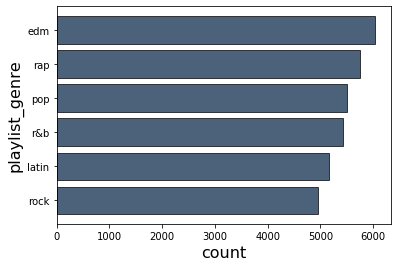

In [32]:
genre_counts_sorted.barh('playlist_genre', 'count')

This makes it much easier to see the ranking of most popular genres.

### Top Artists
Let's take a look at all the artists in the dataset. We can take a look at the top 25 artists based on the number of songs they have in our dataset. We'll follow a similar method as we did when grouping by genre above. First, we will group our data by artist and sort by count.

In [33]:
artists_grouped = spotify.group('track_artist').sort('count', descending=True)
artists_grouped

track_artist              | count
Martin Garrix             | 161
Queen                     | 136
The Chainsmokers          | 123
David Guetta              | 110
Don Omar                  | 102
Drake                     | 100
Dimitri Vegas & Like Mike | 93
Calvin Harris             | 91
Hardwell                  | 84
Kygo                      | 83
... (10683 rows omitted)

The output displays the top 10 artists, but there are over 10,000 artists in our dataset. A visualization with every artist would be very hard to read, so we will focus on the top 25 artists.

In [34]:
top_artists = artists_grouped.take[:25]
top_artists

track_artist              | count
Martin Garrix             | 161
Queen                     | 136
The Chainsmokers          | 123
David Guetta              | 110
Don Omar                  | 102
Drake                     | 100
Dimitri Vegas & Like Mike | 93
Calvin Harris             | 91
Hardwell                  | 84
Kygo                      | 83
... (15 rows omitted)

Creating a bar chart of the number of songs for each artists lets us easily compare the differences between artists.

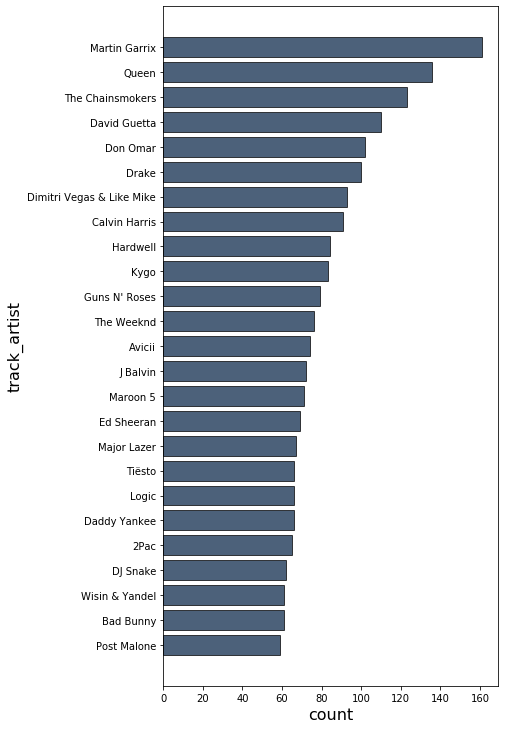

In [35]:
top_artists.barh('track_artist', 'count')

A quick look through the top 25 shows us that all of the top artists are males.

### Analyzing Playlist Popularity
In our dataset, each song is listed as belonging to a particular playlist, and each song is given a "popularity score", called the `track_popularity`. Using the `track_popularity`, we can calculate an "aggregate popularity" for each playlist, which is just the sum of all the popularity scores for the songs on the playlist.

In order to create this aggregate popularity score, we need to group our data by playlist, and sum all of the popularity scores. First, we will create a subset of our `spotify` table using the `select` method. This lets us create a table with only the relevant columns we want. In this case, we only care about the name of the playlist and the popularity of each track. Keep in mind that each row still represents one track, even though we no longer have the track title in our table.

In [87]:
spotify_subset = spotify.select(['playlist_name', 'track_popularity'])
spotify_subset

playlist_name | track_popularity
Pop Remix     | 66
Pop Remix     | 67
Pop Remix     | 70
Pop Remix     | 60
Pop Remix     | 69
Pop Remix     | 67
Pop Remix     | 62
Pop Remix     | 69
Pop Remix     | 68
Pop Remix     | 67
... (32823 rows omitted)

Using the `group` method, we can get a count of the number of songs in each playlist. 

In [106]:
playlists = spotify_subset.group('playlist_name')
playlists

playlist_name                                                | count
"Permanent Wave"                                             | 23
10er Playlist                                                | 61
1987-1997 OLD SKOOL JAMZ                                     | 41
2000's hard rock                                             | 45
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 -  ... | 83
2011-2014 House                                              | 96
2015 songs                                                   | 91
2019 in Indie Poptimism                                      | 98
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               | 247
3rd Coast Classics                                           | 37
... (439 rows omitted)

We can use the `group` method again, this time passing in a second argument `collect`, which says that we want to take the sum rather than the count when grouping. This results in a table with the total aggregate popularity of each playlist.

In [111]:
total_playlist_popularity = spotify_subset.group('playlist_name', collect = sum)
total_playlist_popularity

playlist_name                                                | track_popularity sum
"Permanent Wave"                                             | 849
10er Playlist                                                | 4234
1987-1997 OLD SKOOL JAMZ                                     | 1159
2000's hard rock                                             | 2255
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 -  ... | 5630
2011-2014 House                                              | 2742
2015 songs                                                   | 6088
2019 in Indie Poptimism                                      | 5809
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               | 20547
3rd Coast Classics                                           | 587
... (439 rows omitted)

We can once again use the `column` method to access just the `track_popularity sum` column, and add it to our playlists table using the `with_column` method.

In [112]:
agg_popularity = total_playlist_popularity.column('track_popularity sum')
playlists = playlists.with_column('aggregate_popularity', agg_popularity)
playlists

playlist_name                                                | count | aggregate_popularity
"Permanent Wave"                                             | 23    | 849
10er Playlist                                                | 61    | 4234
1987-1997 OLD SKOOL JAMZ                                     | 41    | 1159
2000's hard rock                                             | 45    | 2255
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 -  ... | 83    | 5630
2011-2014 House                                              | 96    | 2742
2015 songs                                                   | 91    | 6088
2019 in Indie Poptimism                                      | 98    | 5809
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               | 247   | 20547
3rd Coast Classics                                           | 37    | 587
... (439 rows omitted)

Do you think that the most popular playlist would be the one with the highest `aggregate_popularity` score, or the one with the highest number of songs? We can sort our `playlists` table and compare the outputs.

In [113]:
playlists.sort('count', descending=True)

playlist_name                                                | count | aggregate_popularity
Indie Poptimism                                              | 308   | 13107
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               | 247   | 20547
Permanent Wave                                               | 244   | 13261
Hard Rock Workout                                            | 219   | 8713
Ultimate Indie Presents... Best Indie Tracks of the 2010s    | 198   | 11840
Fitness Workout Electro | House | Dance | Progressive House  | 195   | 2319
Southern Hip Hop                                             | 189   | 7024
Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Pop ... | 189   | 12670
Classic Rock 70s 80s 90s, Rock Classics - 70s Rock, 80s  ... | 182   | 5482
Urban Contemporary                                           | 170   | 8770
... (439 rows omitted)

In [114]:
playlists.sort('aggregate_popularity', descending=True)

playlist_name                                                | count | aggregate_popularity
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               | 247   | 20547
Permanent Wave                                               | 244   | 13261
Indie Poptimism                                              | 308   | 13107
Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Pop ... | 189   | 12670
Ultimate Indie Presents... Best Indie Tracks of the 2010s    | 198   | 11840
post teen pop                                                | 166   | 10434
Urban Contemporary                                           | 170   | 8770
Hard Rock Workout                                            | 219   | 8713
Dance Pop                                                    | 138   | 8380
Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop              | 100   | 7913
... (439 rows omitted)

Comparing these two outputs shows us that the "most popular playlist" depends on how we judge popularity. If we have a playlist that has only a few songs, but each of those songs are really popular, should that playlist be higher on the popularity rankings? By way of calculation, playlists with more songs will have a higher aggregate popularity, since more popularity values are being added together. We want a metric that will let us judge the actual quality and popularity of a playlist, not just how many songs it has.

In order to take into account the number of songs on each playlist, we can calculate the "average popularity" of each song on the playlist, or the proportion of aggregate popularity that each song takes up. We can do this by dividing `aggregate_popularity` by `count`. Remember, since the columns are just arrays, we can use array math to calculate these values.

In [115]:
avg_popularity = playlists.column('aggregate_popularity') / playlists.column('count')

We can then add this average popularity back into our `playlists` table.

In [117]:
playlists = playlists.with_column('average_popularity', avg_popularity)
playlists

playlist_name                                                | count | aggregate_popularity | average_popularity
"Permanent Wave"                                             | 23    | 849                  | 36.913
10er Playlist                                                | 61    | 4234                 | 69.4098
1987-1997 OLD SKOOL JAMZ                                     | 41    | 1159                 | 28.2683
2000's hard rock                                             | 45    | 2255                 | 50.1111
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 -  ... | 83    | 5630                 | 67.8313
2011-2014 House                                              | 96    | 2742                 | 28.5625
2015 songs                                                   | 91    | 6088                 | 66.9011
2019 in Indie Poptimism                                      | 98    | 5809                 | 59.2755
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               | 247   | 20547                | 83.1862
3rd Coast Classics                                           | 37    | 587                  | 15.8649
... (439 rows omitted)

Let's see if our "most popular playlist" changes when we judge popularity by the average popularity of the songs on a playlist.

In [98]:
playlists.sort('average_popularity', descending=True)

playlist_name                                   | count | aggregate_popularity | average_popularity
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥  | 247   | 20547                | 83.1862
RapCaviar                                       | 50    | 3985                 | 79.7
Most Popular 2020 TOP 50                        | 48    | 3808                 | 79.3333
Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop | 100   | 7913                 | 79.13
Baila Reggaeton                                 | 50    | 3885                 | 77.7
Intro to Post-Teen Pop                          | 16    | 1239                 | 77.4375
Todo Éxitos                                     | 60    | 4610                 | 76.8333
¡Viva Latino!                                   | 16    | 1223                 | 76.4375
Mansión Reggaetón                               | 27    | 2026                 | 75.037
Global Top 50 | 2020 Hits                       | 40    | 2963                 | 74.075
... (439 rows omitted)

Looking at the table above, we notice that 8/10 of the top 10 most popular playlists by the `average_popularity` metric are playlists with less than 100 songs. Just because a playlist has a lot of songs, or a high aggregate popularity, doesn't mean that the average popularity of a song on that playlist is high. Our new metric of `average_popularity` lets us rank playlists where the size of a playlist has no effect on it's overall score. We can visualize the top 25 playlists by average popularity in a bar chart.

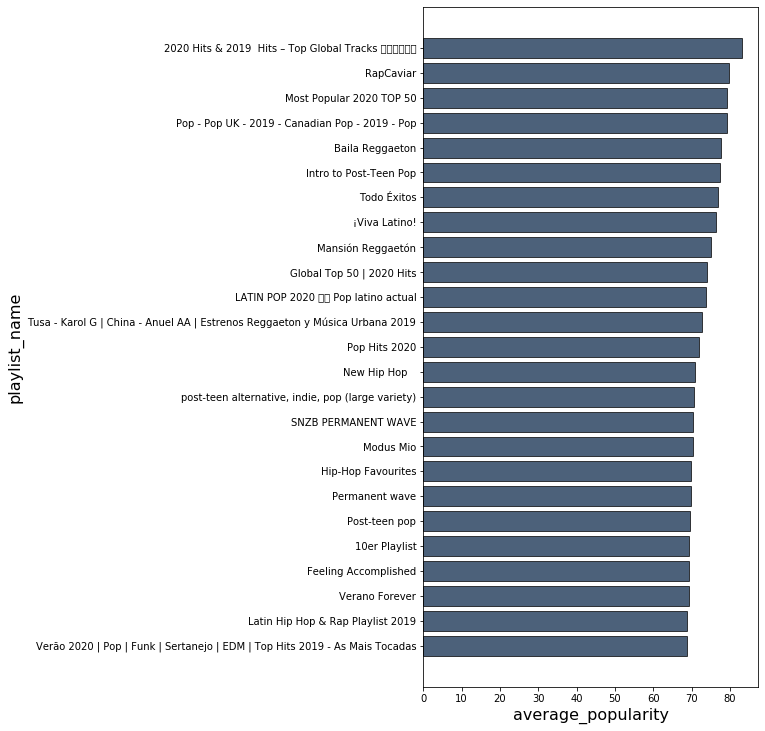

In [118]:
top_25_playlists = playlists.sort('average_popularity', descending=True).take[:25]
top_25_playlists.barh('playlist_name', 'average_popularity')

Creating a new metric like `average_popularity` helps us more accurately and fairly measure the popularity of a playlist. 

We saw before when looking at the top 25 artists that they were all male. Now looking at the top playlists, we see that the current landscape of popular playlists and music may have an effect on the artists that are popular. For example, the RapCaviar is the second most popular playlist, and generally there tends to be fewer female rap artists than male. This shows that the current landscape of popular music can affect the types of artists topping the charts.

## Towards numerical variables
Most of the time, we are not solely interested in categorical variables. Our Spotify data also contains information on the release date of the track, so we can see how many songs were released each year.

In [40]:
# Adding in playlist creation year through pandas --> must be done outside of notebook
spotify['creation_year'] = [x.year for x in pd.Series(spotify.select('track_album_release_date')[0]).apply(pd.to_datetime)]

In [41]:
grouped_years = spotify.select('track_artist', 'creation_year').group('creation_year').sort('count', descending=True)
grouped_years

creation_year | count
2019          | 9081
2018          | 3312
2017          | 2430
2016          | 2127
2015          | 1779
2014          | 1524
2013          | 956
2012          | 786
2020          | 785
2008          | 622
... (53 rows omitted)

Sorting by the descending count lets us see which years had the most songs.

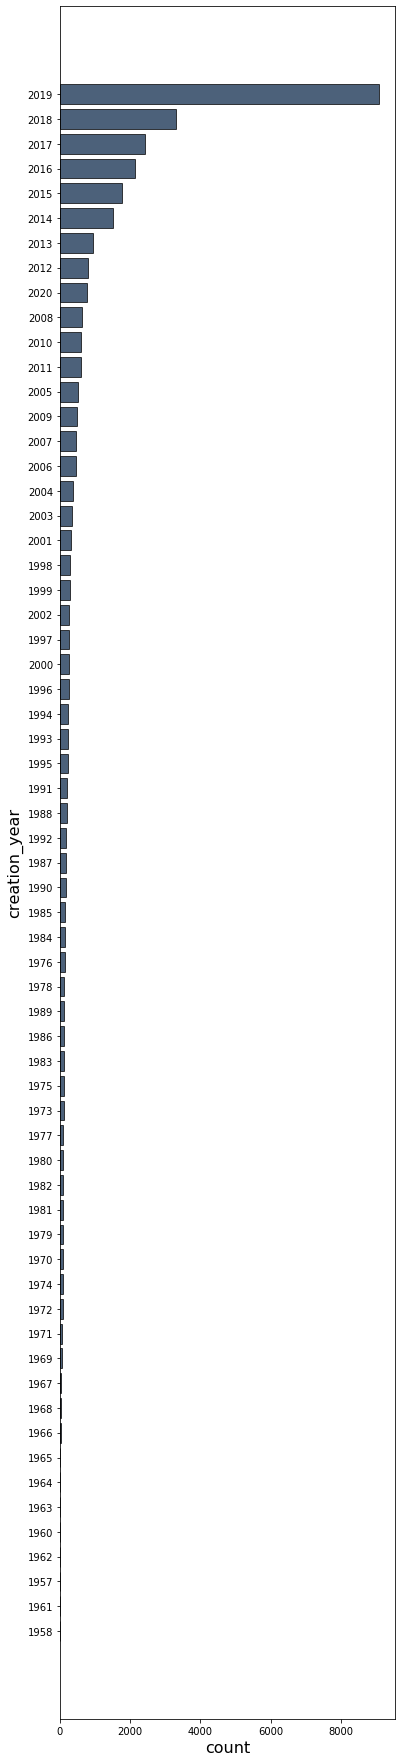

In [42]:
grouped_years.barh('creation_year', 'count')

The longest bars correspond to most recent years, but if you look closely, the years are not listed in chronological order. Years are a fixed chronological unit that have a specified order, but the bar chart is treating year as a categorical variable. We can sort by year instead of by count in order to get a chronological bar chart.

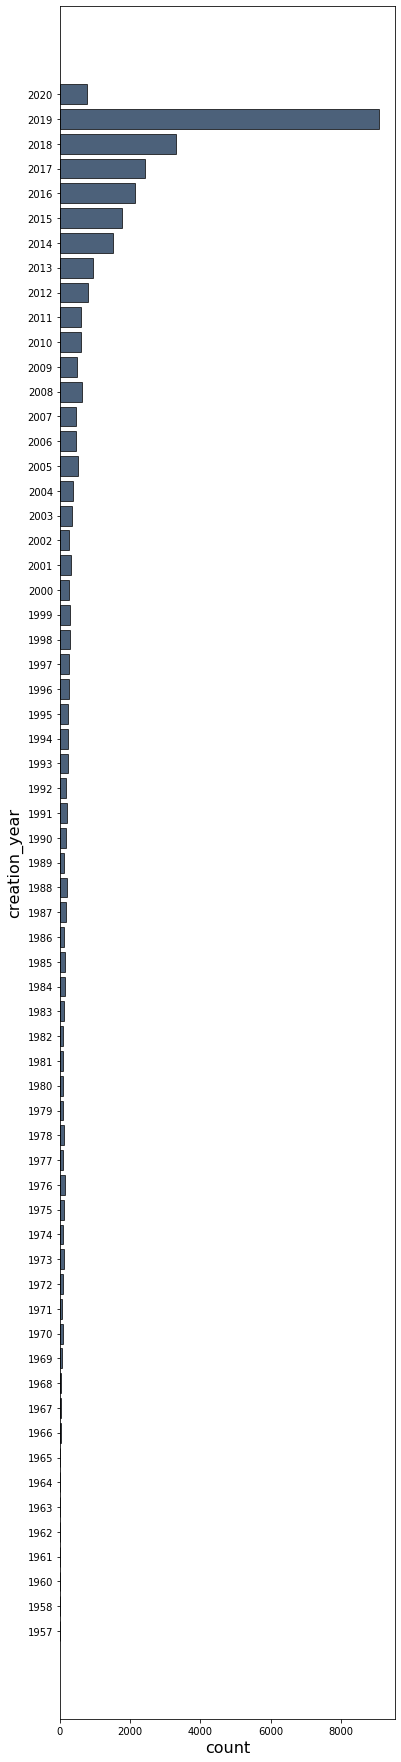

In [43]:
grouped_years.sort('creation_year', descending=True).barh('creation_year', 'count')

Now we can see that more songs have been released in more recent years. The bar for 2020 is much shorter than the bar for 2019, because the data was downloaded in January 2020, when there weren't very many new songs out yet.